## What's this notebook about?

This example illustrates the use of **`view_as_blocks`** function from the **`skimage.util()`** class. Block views can be incredibly useful when one wants to perform local operations on non-overlapping image patches.

We use the astronaut image from **`skimage.data`** and virtually ‘slice’ it into square blocks. Then, on each block, we either pool the mean, the max or the median value of that block using the corresponding NumPy functions. The results are displayed together, along with a spline interpolation of order 3 rescaling of the original astronaut image (using SciPy **`ndimage.zoom()`** method.

In [1]:
import numpy as np
from scipy import ndimage as ndi
from matplotlib import pyplot as plt
import matplotlib.cm as cm

from skimage import data
from skimage import color
from skimage.util import view_as_blocks

### Get the astronaut image from the `skimage.data` in grayscale (use `color.rgb2gray()`)

In [2]:
l = color.rgb2gray(data.astronaut())

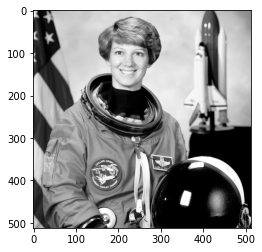

In [3]:
plt.imshow(l,cmap=cm.Greys_r)
plt.show()

In [4]:
l.shape

(512, 512)

In [5]:
l.size

262144

### Size of the blocks

In [6]:
block_shape = (4, 4)

### Transform the image as a matrix of blocks (of shape `block_shape`) and flatten. Examine shapes and sizes

In [7]:
view = view_as_blocks(l, block_shape)

In [8]:
view.size

262144

In [9]:
view.shape

(128, 128, 4, 4)

In [10]:
# collapse the last two dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)

In [11]:
flatten_view.shape

(128, 128, 16)

In [12]:
flatten_view.size

262144

### Resampling the image by taking either the `mean`, the `max` or the `median` value of each blocks

In [13]:
mean_view = np.mean(flatten_view, axis=2)
max_view = np.max(flatten_view, axis=2)
median_view = np.median(flatten_view, axis=2)

### Display resampled (and a zoomed version with spline interpolation) side by side

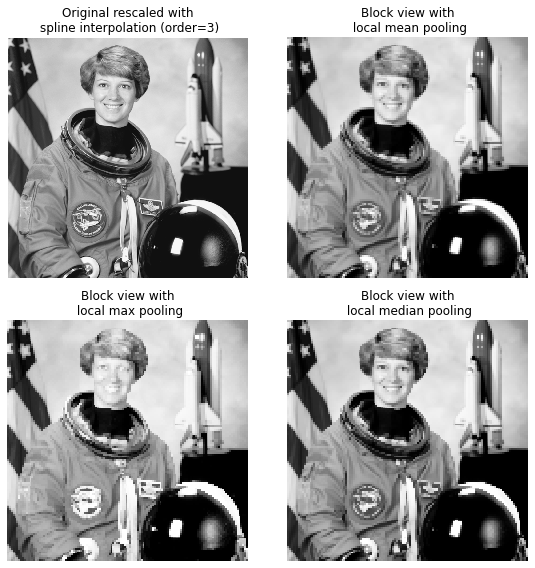

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

# Resized by spline interpolation (SciPy ndimage method)
l_resized = ndi.zoom(l, 2, order=3)
ax[0].set_title("Original rescaled with\n spline interpolation (order=3)")
ax[0].imshow(l_resized, extent=(0, 128, 128, 0), interpolation='nearest',
             cmap=cm.Greys_r)

ax[1].set_title("Block view with\n local mean pooling")
ax[1].imshow(mean_view, interpolation='nearest', cmap=cm.Greys_r)

ax[2].set_title("Block view with\n local max pooling")
ax[2].imshow(max_view, interpolation='nearest', cmap=cm.Greys_r)

ax[3].set_title("Block view with\n local median pooling")
ax[3].imshow(median_view, interpolation='nearest', cmap=cm.Greys_r)

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

### Print the size of the sampled images vs. the re-sized (interpolated) image

In [15]:
print("Size of the resized image:", l_resized.size)
print("Size of the mean image:", mean_view.size)
print("Size of the max image:", max_view.size)
print("Size of the median image:", median_view.size)

Size of the resized image: 1048576
Size of the mean image: 16384
Size of the max image: 16384
Size of the median image: 16384
